In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3.3 스팸 문자 분류

## 3.3.2 데이터 불러오기

In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/data/Spam Text Message Classification/SPAM text message 20170820 - Data.csv'
df = pd.read_csv(file_path)

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 자연어 탐색적 데이터 분석 (EDA)

In [2]:
# 1. 기초적인 통계정보 확인 (데이터의 형상 및 데이터 타입 등)

df.shape

(5572, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# 2. 긍정, 부정 데이터의 분포

df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [6]:
import plotly.express as px

fig = px.bar(df['Category'].value_counts(),
             width=500,
             height=300)
fig.show()

In [7]:
# 3. 각 리뷰의 문자 길이 분포 (문자길이)

print( df['Message'][1] )
print( len(df['Message'][1]) )

Ok lar... Joking wif u oni...
29


In [8]:
print( df['Message'][2], '\n' )

print( len(df['Message'][2]) )

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

155


In [9]:
import numpy as np

message_lenght = df['Message'].astype(str).apply(len)

print('최대 값: {}'.format(np.max(message_lenght)))
print('최소 값: {}'.format(np.min(message_lenght)))
print('평균 값: {:.2f}'.format(np.mean(message_lenght)))
print('표준편차: {:.2f}'.format(np.std(message_lenght)))
print('중간 값: {}'.format(np.median(message_lenght)))

print('25 백분위수: {}'.format(np.percentile(message_lenght, 25)))
print('50 백분위수: {}'.format(np.percentile(message_lenght, 50)))
print('75 백분위수: {}'.format(np.percentile(message_lenght, 75)))

최대 값: 910
최소 값: 2
평균 값: 80.37
표준편차: 59.92
중간 값: 61.0
25 백분위수: 35.75
50 백분위수: 61.0
75 백분위수: 122.0


In [10]:
import plotly.express as px

message_lenght = df['Message'].astype(str).apply(len)

fig = px.histogram(message_lenght)
fig.show()

In [11]:
# 4. 각 리뷰의 단어 개수 분포 (단어개수))

word_count = df['Message'].astype(str).apply(lambda x:len(x.split(' ')))

print('최대 값: {}'.format(np.max(word_count)))
print('최소 값: {}'.format(np.min(word_count)))
print('평균 값: {:.2f}'.format(np.mean(word_count)))
print('표준편차: {:.2f}'.format(np.std(word_count)))
print('중간 값: {}'.format(np.median(word_count)))

print('25 백분위수: {}'.format(np.percentile(word_count, 25)))
print('50 백분위수: {}'.format(np.percentile(word_count, 50)))
print('75 백분위수: {}'.format(np.percentile(word_count, 75)))

최대 값: 171
최소 값: 1
평균 값: 15.66
표준편차: 11.49
중간 값: 12.0
25 백분위수: 7.0
50 백분위수: 12.0
75 백분위수: 23.0


In [12]:
import plotly.express as px

word_count = df['Message'].astype(str).apply(lambda x:len(x.split(' ')))

fig = px.histogram(word_count)
fig.show()

In [13]:
# 5. 특수문자 및 대문자, 소문자 비율

# 물음표가 구두점으로 쓰임
qmarks = np.mean(df['Message'].apply(lambda x: '?' in x)) 
# 마침표
fullstop = np.mean(df['Message'].apply(lambda x: '.' in x))
#  첫번째 대문자
capital_first = np.mean(df['Message'].apply(lambda x: x[0].isupper())) 
# 대문자가 몇개
capitals = np.mean(df['Message'].apply(lambda x: max([y.isupper() for y in x])))
# 숫자가 몇개
numbers = np.mean(df['Message'].apply(lambda x: max([y.isdigit() for y in x])))
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 21.97%
마침표가 있는 질문: 65.61%
첫 글자가 대문자 인 질문: 95.37%
대문자가있는 질문: 98.42%
숫자가있는 질문: 26.20%


(-0.5, 799.5, 599.5, -0.5)

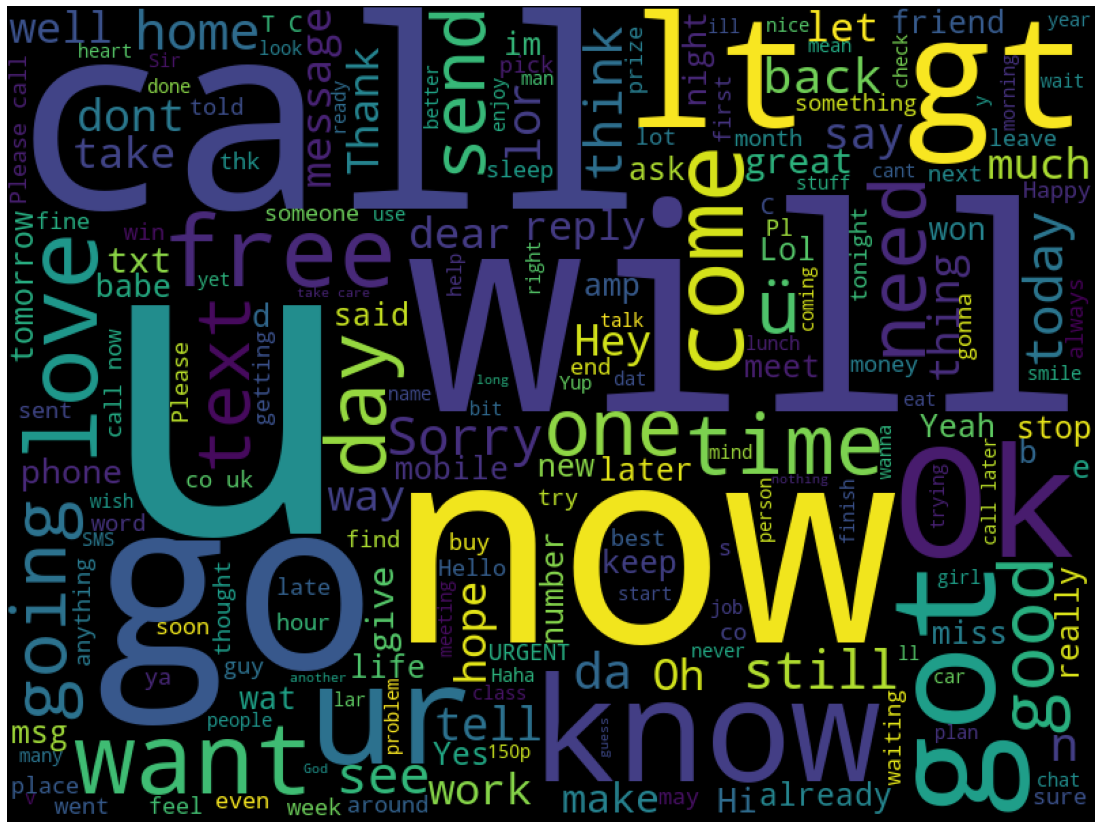

In [14]:
#6. 많이 사용된 단어
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(width=800, height=600).generate(" ".join(df['Message']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

## 3.3.4 자연어 데이터 전처리

In [15]:
#1. 데이터 정재(Cleaning)

df['Message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [16]:
import re

# 영어와 한글이 아닌 문자는 공백으로 변환
message_text = re.sub('[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣]', ' ', df['Message'][2]) 
print(message_text)

Free entry in   a wkly comp to win FA Cup final tkts   st May       Text FA to       to receive entry question std txt rate T C s apply            over   s


In [17]:
# 소문자 변환
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))

message_lower_text = message_text.lower().split()

print(message_lower_text)

대문자가있는 질문: 98.42%
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']


In [18]:
# 3. 불용어(Stopword) 제거
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords = stopwords.words('english')

print('\n', stopwords)
print('\n', len(stopwords))


 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
print( message_lower_text )

print([word for word in message_lower_text if word not in stopwords])

['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']


In [20]:
# 5. 정규화(Normalization) : 어간추출

from nltk.stem import PorterStemmer

stemmer = nltk.stem.PorterStemmer()

message_lower_stemmer_text = [stemmer.stem(w) for w in message_lower_text]

print(message_lower_text, '\n')
print(message_lower_stemmer_text)

['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's'] 

['free', 'entri', 'in', 'a', 'wkli', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkt', 'st', 'may', 'text', 'fa', 'to', 'to', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'appli', 'over', 's']


In [21]:
# 2~5 과정 데이터 전처리

def message_to_words( raw_message ):
    # 1. HTML 제거
    #raw_message = BeautifulSoup(raw_message, 'html.parser').get_text()
    
    # 2. 영문자가 아닌 문자는 공백으로 치환
    #letters_only = re.sub('[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣]', ' ', raw_message)
    letters_only = re.sub('[^a-zA-Z]', ' ', raw_message)
    
    # 3. 소문자 변환
    words = letters_only.lower().split()
    
    # 4. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stopwords]
    
    # 5. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    # 6. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [22]:
clean_message = message_to_words(df['Message'][2])

print(len(df['Message'][2]))
print(df['Message'][2], '\n')
print(len(clean_message))
print(clean_message)

155
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

99
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli


In [23]:
# 참고 : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/

from multiprocessing import Pool

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [24]:
clean_train_message = apply_by_multiprocessing(df['Message'], message_to_words, workers=4)

df['Message_clean'] = clean_train_message

df

,Category,Message,Message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tri contact u u pound prize claim easi...
5568,ham,Will ü b going to esplanade fr home?,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [25]:
message_lenght = df['Message'].astype(str).apply(len)
message_clean_len = df['Message_clean'].astype(str).apply(len)

print('Message')
print('최대 값: {}'.format(np.max(message_lenght)))
print('최소 값: {}'.format(np.min(message_lenght)))
print('평균 값: {:.2f}'.format(np.mean(message_lenght)))
print('표준편차: {:.2f}'.format(np.std(message_lenght)))
print('중간 값: {}'.format(np.median(message_lenght)), '\n')

print('Message_clean')
print('최대 값: {}'.format(np.max(message_clean_len)))
print('최소 값: {}'.format(np.min(message_clean_len)))
print('평균 값: {:.2f}'.format(np.mean(message_clean_len)))
print('표준편차: {:.2f}'.format(np.std(message_clean_len)))
print('중간 값: {}'.format(np.median(message_clean_len)))

Message
최대 값: 910
최소 값: 2
평균 값: 80.37
표준편차: 59.92
중간 값: 61.0 

Message_clean
최대 값: 412
최소 값: 0
평균 값: 46.18
표준편차: 35.74
중간 값: 35.0


(-0.5, 799.5, 599.5, -0.5)

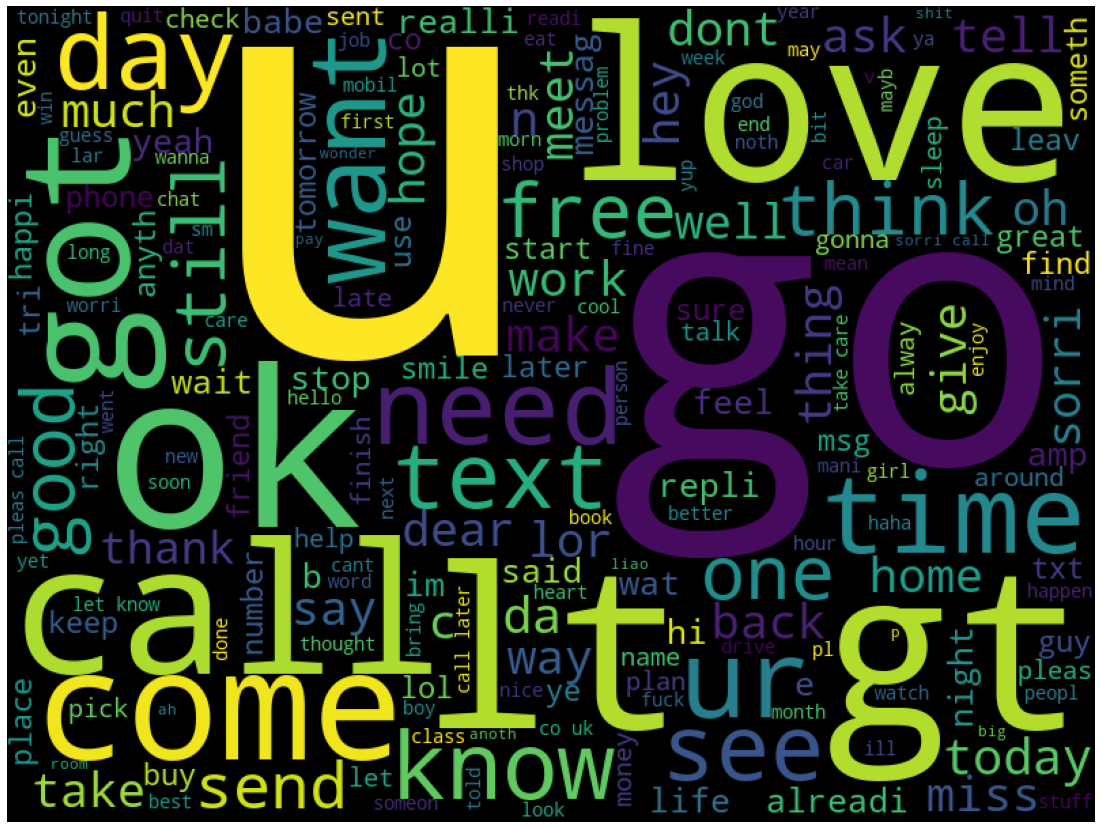

In [26]:
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(" ".join(df['Message_clean']))

plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [27]:
# 데이터 분리 및 기본적인 데이터 전처리

df['Category'] = df['Category'].replace(['ham','spam'],[0,1])

In [28]:
print(df.shape)

df.drop_duplicates(subset=['Message_clean'], inplace=True)

print(df.shape)

(5572, 3)
(5056, 3)


In [29]:
df.sort_values(by='Message_clean' ,ascending=True)

,Category,Message,Message_clean
253,0,What you doing?how are you?,
5323,0,Aah bless! How's your arm?,aah bless arm
4257,0,Aah! A cuddle would be lush! I'd need lots of ...,aah cuddl would lush need lot tea soup kind fumbl
156,0,Aaooooright are you at work?,aaooooright work
427,0,aathi..where are you dear..,aathi dear
...,...,...,...
628,0,Yup i thk they r e teacher said that will make...,yup thk r e teacher said make face look longer...
3672,0,Yup. Thk of u oso boring wat.,yup thk u oso bore wat
3378,0,Yup. Wun believe wat? U really neva c e msg i ...,yup wun believ wat u realli neva c e msg sent ...
2685,0,Yupz... I've oredi booked slots 4 my weekends ...,yupz oredi book slot weekend liao


In [30]:
df = df.drop(253)
df.sort_values(by='Message_clean' ,ascending=True)

,Category,Message,Message_clean
5323,0,Aah bless! How's your arm?,aah bless arm
4257,0,Aah! A cuddle would be lush! I'd need lots of ...,aah cuddl would lush need lot tea soup kind fumbl
156,0,Aaooooright are you at work?,aaooooright work
427,0,aathi..where are you dear..,aathi dear
2456,0,"Abeg, make profit. But its a start. Are you us...",abeg make profit start use get sponsor next event
...,...,...,...
628,0,Yup i thk they r e teacher said that will make...,yup thk r e teacher said make face look longer...
3672,0,Yup. Thk of u oso boring wat.,yup thk u oso bore wat
3378,0,Yup. Wun believe wat? U really neva c e msg i ...,yup wun believ wat u realli neva c e msg sent ...
2685,0,Yupz... I've oredi booked slots 4 my weekends ...,yupz oredi book slot weekend liao


In [31]:
from sklearn.model_selection import train_test_split

X_data = df['Message_clean']
y_data = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    shuffle=None)

In [32]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(4044,) (4044,)
(1011,) (1011,)


In [33]:
# 토근화(Tokenization)

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_tokenizer = tokenizer.texts_to_sequences(X_train)

print(X_train[2:3])
print(X_train_tokenizer[2])

2599    oki thanx
Name: Message_clean, dtype: object
[631, 313]


In [34]:
index_to_word = tokenizer.index_word

print(index_to_word[631])
print(index_to_word[313])

oki
thanx


In [35]:
print( tokenizer.index_word )

{1: 'u', 2: 'call', 3: 'go', 4: 'get', 5: 'ur', 6: 'come', 7: 'gt', 8: 'lt', 9: 'ok', 10: 'day', 11: 'like', 12: 'love', 13: 'know', 14: 'time', 15: 'want', 16: 'free', 17: 'good', 18: 'got', 19: 'text', 20: 'need', 21: 'one', 22: 'send', 23: 'think', 24: 'stop', 25: 'see', 26: 'today', 27: 'txt', 28: 'r', 29: 'n', 30: 'take', 31: 'lor', 32: 'still', 33: 'k', 34: 'tell', 35: 'p', 36: 'make', 37: 'home', 38: 'da', 39: 'back', 40: 'repli', 41: 'ask', 42: 'hope', 43: 'pleas', 44: 'sorri', 45: 'dont', 46: 'hi', 47: 'mobil', 48: 'work', 49: 'say', 50: 'new', 51: 'miss', 52: 'give', 53: 'week', 54: 'hey', 55: 'phone', 56: 'meet', 57: 'night', 58: 'co', 59: 'well', 60: 'c', 61: 'much', 62: 'oh', 63: 'great', 64: 'wait', 65: 'wat', 66: 'thing', 67: 'msg', 68: 'dear', 69: 'min', 70: 'number', 71: 'later', 72: 'tri', 73: 'pl', 74: 'b', 75: 'happi', 76: 'way', 77: 'thank', 78: 'alreadi', 79: 'messag', 80: 'feel', 81: 'realli', 82: 'e', 83: 'let', 84: 'ye', 85: 'claim', 86: 'friend', 87: 'even', 8

In [36]:
# 패딩 (Padding) 처리

X_train_tokenizer[0:3]

[[46, 1849, 9, 1217, 1850, 223, 17, 1851, 39, 535, 810],
 [23, 509, 97, 171, 1059, 1218, 126, 1852],
 [631, 313]]

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 11
X_train_padded = pad_sequences(X_train_tokenizer[0:3], maxlen = max_len)
X_train_padded

array([[  46, 1849,    9, 1217, 1850,  223,   17, 1851,   39,  535,  810],
       [   0,    0,    0,   23,  509,   97,  171, 1059, 1218,  126, 1852],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  631,  313]],
      dtype=int32)

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# message 최대 값: 412
# message 평균 값: 45.11

max_len = 200
X_train_padded = pad_sequences(X_train_tokenizer, maxlen = max_len)

## 3.3.5 모델 생성

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

vocab_size = len(index_to_word) + 1
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

earlyetopping_callback = EarlyStopping(monitor="val_loss", 
  patience=10)

modelcheckpoint_callback = ModelCheckpoint(
  filepath="best_checkpoint_model.h5",
  monitor="val_loss",
  save_weights_only=True,
  save_best_only=True,
  verbose=1)

## 3.3.6 SimpleRNN 모델 학습 및 평가

In [41]:
%%time
history = model.fit(X_train_padded, y_train,
  validation_split=0.2,
  epochs=50, 
  batch_size=64,
  callbacks=[earlyetopping_callback, modelcheckpoint_callback])

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8736
Epoch 1: val_loss improved from inf to 0.32507, saving model to best_checkpoint_model.h5
51/51 [==============================] - 4s 57ms/step - loss: 0.4209 - accuracy: 0.8736 - val_loss: 0.3251 - val_accuracy: 0.8776
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.1508 - accuracy: 0.9623
Epoch 2: val_loss improved from 0.32507 to 0.10017, saving model to best_checkpoint_model.h5
51/51 [==============================] - 3s 49ms/step - loss: 0.1508 - accuracy: 0.9623 - val_loss: 0.1002 - val_accuracy: 0.9753
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.0617 - accuracy: 0.9856
Epoch 3: val_loss improved from 0.10017 to 0.07378, saving model to best_checkpoint_model.h5
51/51 [==============================] - 3s 49ms/step - loss: 0.0612 - accuracy: 0.9858 - val_loss: 0.0738 - val_accuracy: 0.9790
Epoch 4/50
51/51 [==============================] - E

In [42]:
X_test_tokenizer = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_tokenizer, maxlen = max_len)

print("\n테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

32/32 [==============================] - 0s 12ms/step - loss: 0.1307 - accuracy: 0.9713

테스트 정확도: 0.9713


In [43]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])

# model history
epoch = history.epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Scatter
fig.add_trace(go.Scatter(x=epoch, y=loss, name="loss"),secondary_y=False,)
fig.add_trace(go.Scatter(x=epoch, y=val_loss, name="val_loss"),secondary_y=False,)
fig.add_trace(go.Scatter(x=epoch, y=accuracy, name="accuracy"),secondary_y=True,)
fig.add_trace(go.Scatter(x=epoch, y=val_accuracy, name="val_accuracy"),secondary_y=True,)

# Templates configuration, Default template: 'plotly'
# Available templates: ['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
fig.update_layout(title_text="<b>Loss/Accuracy of Model</b>", template='plotly')

fig.update_xaxes(title_text="Epoch")
fig.update_yaxes(title_text="Loss", secondary_y=False)
fig.update_yaxes(title_text="Accuracy", secondary_y=True)
fig.show()

## 3.3.7 LSTM 모델 학습 및 평가

In [44]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense

vocab_size = len(index_to_word) + 1
embedding_dim = 32
hidden_units = 32

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim))
lstm_model.add(LSTM(hidden_units))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = lstm_model.fit(X_train_padded, y_train,
  validation_split=0.2,
  epochs=50, 
  batch_size=32,
  callbacks=[earlyetopping_callback, modelcheckpoint_callback])

Epoch 1/50
102/102 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.9054
Epoch 1: val_loss did not improve from 0.07040
102/102 [==============================] - 14s 110ms/step - loss: 0.2531 - accuracy: 0.9054 - val_loss: 0.1287 - val_accuracy: 0.9691
Epoch 2/50
102/102 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9842
Epoch 2: val_loss did not improve from 0.07040
102/102 [==============================] - 11s 109ms/step - loss: 0.0770 - accuracy: 0.9842 - val_loss: 0.0745 - val_accuracy: 0.9852
Epoch 3/50
102/102 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9895
Epoch 3: val_loss improved from 0.07040 to 0.06996, saving model to best_checkpoint_model.h5
102/102 [==============================] - 9s 90ms/step - loss: 0.0388 - accuracy: 0.9895 - val_loss: 0.0700 - val_accuracy: 0.9839
Epoch 4/50
102/102 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9929
Epoch 4: val_loss did not imp

In [45]:
print("\n테스트 정확도: %.4f" % (lstm_model.evaluate(X_test_padded, y_test)[1]))

32/32 [==============================] - 1s 19ms/step - loss: 0.1365 - accuracy: 0.9773

테스트 정확도: 0.9773


## 3.3.8 GRU 모델 학습 및 평가

In [46]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Embedding, Dense

vocab_size = len(index_to_word) + 1
embedding_dim = 32
hidden_units = 32

gru_model = Sequential()
gru_model.add(Embedding(vocab_size, embedding_dim))
gru_model.add(GRU(hidden_units))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = gru_model.fit(X_train_padded, y_train,
  validation_split=0.2,
  epochs=50, 
  batch_size=32,
  callbacks=[earlyetopping_callback, modelcheckpoint_callback])

Epoch 1/50
102/102 [==============================] - ETA: 0s - loss: 0.2468 - accuracy: 0.9091
Epoch 1: val_loss did not improve from 0.06996
102/102 [==============================] - 13s 97ms/step - loss: 0.2468 - accuracy: 0.9091 - val_loss: 0.1032 - val_accuracy: 0.9728
Epoch 2/50
102/102 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9839
Epoch 2: val_loss did not improve from 0.06996
102/102 [==============================] - 10s 94ms/step - loss: 0.0545 - accuracy: 0.9839 - val_loss: 0.0705 - val_accuracy: 0.9827
Epoch 3/50
102/102 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9898
Epoch 3: val_loss did not improve from 0.06996
102/102 [==============================] - 9s 92ms/step - loss: 0.0294 - accuracy: 0.9898 - val_loss: 0.0740 - val_accuracy: 0.9802
Epoch 4/50
102/102 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9941
Epoch 4: val_loss did not improve from 0.06996
102/102 [=====================

In [47]:
print("\n테스트 정확도: %.4f" % (gru_model.evaluate(X_test_padded, y_test)[1]))

32/32 [==============================] - 1s 18ms/step - loss: 0.1274 - accuracy: 0.9812

테스트 정확도: 0.9812
